In [1]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *
from IPython.display import Image

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

path_data = '/Users/ychen/Documents/projects/research/textbook/assets/data/'


# Functions

In [2]:
# Our first function definition

def double(x):
    """ Double x """
    return 2*x


In [3]:
double(17)


34

In [4]:
double(-0.6/4)


-0.3

In [5]:
any_name = 42
double(any_name)


84

In [6]:
double(make_array(3, 4, 5))


array([ 6,  8, 10])

In [7]:
x


NameError: name 'x' is not defined

In [8]:
# A function with more than one argument

def percent(x, total):
    """Convert x to a percentage of total.
    
    More precisely, this function divides x by total,
    multiplies the result by 100, and rounds the result
    to two decimal places.
    
    >>> percent(4, 16)
    25.0
    >>> percent(1, 6)
    16.67
    """
    return round((x/total)*100, 2)


In [9]:
percent(33, 200)


16.5

In [10]:
def percents(counts):
    """Convert the values in array_x to percents out of the total of array_x."""
    total = counts.sum()
    return np.round((counts/total)*100, 2)


In [11]:
some_array = make_array(7, 10, 4)
percents(some_array)


array([33.33, 47.62, 19.05])

In [12]:
def biggest_difference(array_x):
    """Find the biggest difference in absolute value between two adjacent elements of array_x."""
    diffs = np.diff(array_x)
    absolute_diffs = abs(diffs)
    return max(absolute_diffs)

some_numbers = make_array(2, 4, 5, 6, 4, -1, 1)
big_diff = biggest_difference(some_numbers)
print("The biggest difference is", big_diff)


The biggest difference is 5


- Multiple Arguments

In [13]:
def percents(counts, decimal_places):
    """Convert the values in array_x to percents out of the total of array_x."""
    total = counts.sum()
    return np.round((counts/total)*100, decimal_places)

parts = make_array(2, 1, 4)
print("Rounded to 1 decimal place: ", percents(parts, 1))
print("Rounded to 2 decimal places:", percents(parts, 2))
print("Rounded to 3 decimal places:", percents(parts, 3))


Rounded to 1 decimal place:  [28.6 14.3 57.1]
Rounded to 2 decimal places: [28.57 14.29 57.14]
Rounded to 3 decimal places: [28.571 14.286 57.143]


In [14]:
def percents(counts, decimal_places=2):
    """Convert the values in array_x to percents out of the total of array_x."""
    total = counts.sum()
    return np.round((counts/total)*100, decimal_places)

parts = make_array(2, 1, 4)
print("Rounded to 1 decimal place:", percents(parts, 1))
print("Rounded to the default number of decimal places:", percents(parts))


Rounded to 1 decimal place: [28.6 14.3 57.1]
Rounded to the default number of decimal places: [28.57 14.29 57.14]


- Applying a Function to a Column

In [15]:
def cut_off_at_100(x):
    """The smaller of x and 100"""
    return min(x, 100)


In [16]:
cut_off_at_100(17)


17

In [17]:
cut_off_at_100(117)


100

In [18]:
cut_off_at_100(100)


100

In [19]:
ages = Table().with_columns(
    'Person', make_array('A', 'B', 'C', 'D', 'E', 'F'),
    'Age', make_array(17, 117, 52, 100, 6, 101)
)
ages


Person,Age
A,17
B,117
C,52
D,100
E,6
F,101


- apply

In [20]:
ages.apply(cut_off_at_100, 'Age')


array([ 17, 100,  52, 100,   6, 100])

In [21]:
ages.with_column(
    'Cut Off Age', ages.apply(cut_off_at_100, 'Age')
)


Person,Age,Cut Off Age
A,17,17
B,117,100
C,52,52
D,100,100
E,6,6
F,101,100


Functions as Values
- When we write a function’s name by itself as the last line in a cell, Python produces a text representation of the function, just like it would print out a number or a string value.

In [22]:
cut_off_at_100


<function __main__.cut_off_at_100(x)>

In [23]:
cut_off = cut_off_at_100


In [24]:
cut_off


<function __main__.cut_off_at_100(x)>

- Prediction

In [25]:
# Data on heights of parents and their adult children
family_heights = Table.read_table(path_data + 'family_heights.csv').drop(3)
family_heights


family,father,mother,children,childNum,sex,childHeight
1,78.5,67,4,1,male,73.2
1,78.5,67,4,2,female,69.2
1,78.5,67,4,3,female,69
1,78.5,67,4,4,female,69
2,75.5,66.5,4,1,male,73.5
2,75.5,66.5,4,2,male,72.5
2,75.5,66.5,4,3,female,65.5
2,75.5,66.5,4,4,female,65.5
3,75,64,2,1,male,71
3,75,64,2,2,female,68


In [26]:
parent_averages = (family_heights.column('father') + family_heights.column('mother'))/2
heights = Table().with_columns(
    'Parent Average', parent_averages,
    'Child', family_heights.column('childHeight')
)
heights


Parent Average,Child
72.75,73.2
72.75,69.2
72.75,69
72.75,69
71,73.5
71,72.5
71,65.5
71,65.5
69.5,71
69.5,68


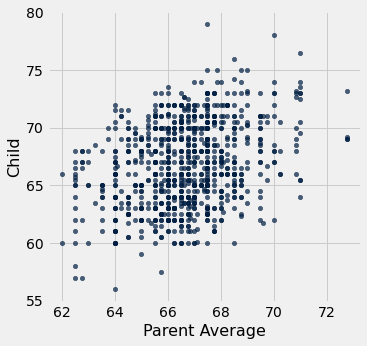

In [27]:
heights.scatter('Parent Average')


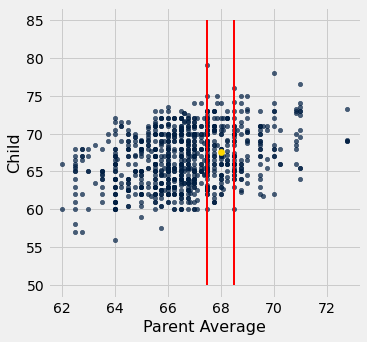

In [32]:
heights.scatter('Parent Average')
plt.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plt.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plt.scatter(68, 67.62, color='gold', s=40);


In [33]:
close_to_68 = heights.where('Parent Average', are.between(67.5, 68.5))
close_to_68


Parent Average,Child
68,74
68,70
68,68
68,67
68,67
68,66
68,63.5
68,63
67.5,65
68.1,62.7


In [34]:
np.average(close_to_68.column('Child'))


67.62

In [35]:
def predict_child(p_avg):
    """Predict the height of a child whose parents have a parent average height of p_avg.
    
    The prediction is the average height of the children whose parent average height is
    in the range p_avg plus or minus 0.5.
    """
    
    close_points = heights.where('Parent Average', are.between(p_avg-0.5, p_avg + 0.5))
    return np.average(close_points.column('Child'))                     


In [36]:
predict_child(68)


67.62

In [37]:
predict_child(66)


66.08640776699029

In [39]:
# Apply predict_child to all the midparent heights

heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'Parent Average')
)
heights_with_predictions


Parent Average,Child,Prediction
72.75,73.2,70.1
72.75,69.2,70.1
72.75,69,70.1
72.75,69,70.1
71,73.5,70.4158
71,72.5,70.4158
71,65.5,70.4158
71,65.5,70.4158
69.5,71,68.5025
69.5,68,68.5025


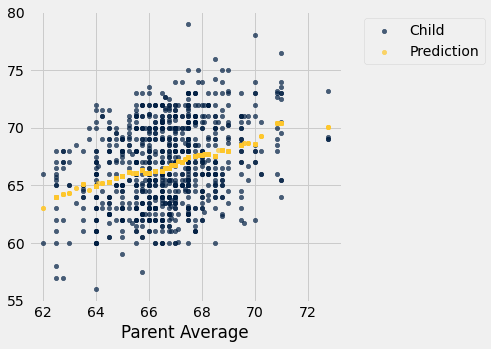

In [40]:
heights_with_predictions.scatter('Parent Average')


- The graph of gold dots is called a graph of averages, because each gold dot is the center of a vertical strip like the one we drew earlier.

In [41]:
predict_child(65)


65.83829787234043

- The method used here was a precursor to nearest neighbor prediction methods that now have powerful applications in diverse settings. 
- The modern field of machine learning includes the automation of such methods to make predictions based on vast and rapidly evolving datasets.